<a href="https://colab.research.google.com/github/onewon1234/AIDeepLearning/blob/main/chapter03_introduction_to_keras_and_tf_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.17017159]
 [-0.6535005 ]
 [-1.8108615 ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.70369077]
 [0.7235192 ]
 [0.96387887]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.2537949],
       [ 1.2871369],
       [-0.5538965]], dtype=float32)>


**Assigning a value to a TensorFlow variable**
- 넘파이(NumPy)랑 달리 직접 대입으로 값을 바꿀 수 없음 => assign 함수 사용해야함!!

In [ ]:
v.assign(tf.ones((3, 1)))  #새로운 value assign하는 방법

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
v[0, 0].assign(3.)

NameError: name 'v' is not defined

**Using `assign_add`**

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)    #행렬곱
e *= d    # e=e*d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [ ]:
input_var = tf.Variable(initial_value=3.)    #variable -> 미분 가능한 대상이어야 함
with tf.GradientTape() as tape:
   result = tf.square(input_var)   #x^2 -> 변수의 제곱을 함
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [ ]:
input_const = tf.constant(3.)     #constant -> 상수 텐서로 미분 대상이 아님
with tf.GradientTape() as tape:   ##미분 함수 호출
   tape.watch(input_const)     #tape.watch()로 constant를 수동으로 미분 가능하게끔 만듦
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)    #자동으로 미분 추적, tf.constant와 달리 미분 대상이자, 학습 가능한 변수임
with tf.GradientTape() as outer_tape:       #outer_tape: 2차 미분
    with tf.GradientTape() as inner_tape:   #inner_tape: 1차 미분
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

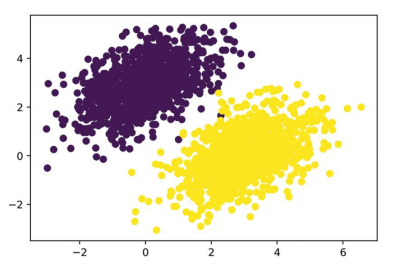
- 노란색: 1, 보라색: 0

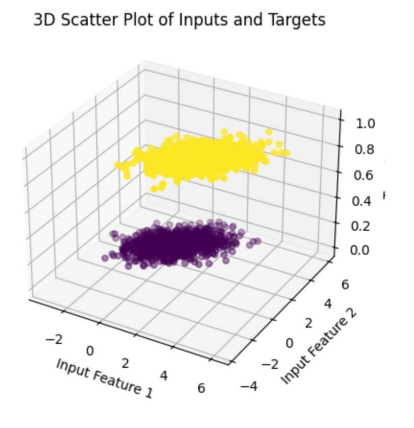

- 3D로 그리면 위와 같이 됨.
- 노란색과 보라색을 가르는 초평면(hyperplane)을 하나 만들어야 함


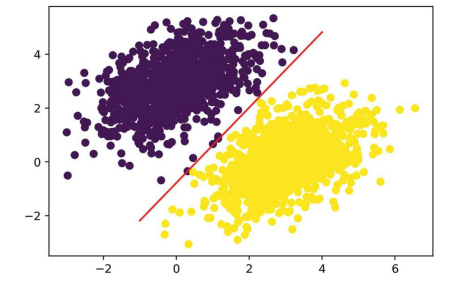

- 이렇게 둘을 가르는 선형 직선 하나표

In [ ]:
num_samples_per_class = 1000    #각각 1000개의 2차원 데이터 샘플 생성
negative_samples = np.random.multivariate_normal(    #2차원(다차원) 가우시안 분포 데이터
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],    # 2차원 공분산 행렬 => 2차원 벡터(x[x의 분산, xy 공분산], y[yx 공분산, y의 분산])
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)    #각각 (1000,2) dimemsion 을 vstack하면 (2000,2)가 됨 / float32: 32비트 부동소수점 형식으로 데이터 변환

In [ ]:
inputs.shape

(2000, 2)

**Generating the corresponding targets (0 and 1)**

- 앞에서 생성한 negative_samples, positive_samples에 대한 정답 레이블(target label)만들기

- 입력 벡터는 x축, y축 값을 지정해야 했기 때문에 열을 2개로 입력한 2D 이력 '벡터'라면 targets(출력) 벡터는 각 샘플이 어디 속하는지 알려주는 정답값이기에 '스칼라'여서 클래스 번호 하나만 지정함

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),     #1000개의 음성 클래스(0) 레이블
                     np.ones((num_samples_per_class, 1), dtype="float32")))     #1000개의 양성 클래스(1) 레이블

**Plotting the two point classes**

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])   # x축 좌표, y축 좌표, 점의 색상(색 정보는 1차원 배열이기에 1열만 뽑아서 색 자동 지정되게 함)
plt.show()

NameError: name 'inputs' is not defined

**Creating the linear classifier variables**

In [ ]:
input_dim = 2   #입력 차원: 2차원 데이터
output_dim = 1  #출력 차원: 클래스 하나
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))   #W(가중치): 입력 2차원 -> 1차원으로 선형 결합한 행렬
#random.uniform으로 무작위값으로 시작해서 gardient descent로 조금씩 값 보정(시작값을 무작위로 다르게 해야 값들이 골고루 퍼지면서  학습이 다양하게 진해됨)
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))    #b(편향): 출력 차원에 더해지는 값, 0으로 초기화(초기값 설정)

**The forward pass function**

In [ ]:
#선형 모델 만들기
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

- 일반적으로 linear regression에서 사용
- 공식: MSE = 1/n*∑(y_{i} - ŷ_{i})^2

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)   #전체 샘플에 대한 손실값(오차)의 평균값 계산

**The training step function**
- learning rate(학습률): 얼마나 빠르게 가중치(W)와 편향(b)를 조정할지 결정
 - 값이 클수록  빠르게 학습 BUT 불안정할 수 있음
 - 값이 작을수록 안정적으로 학습 BUT 느릴 수 있음
 => 보통 0.001~0.1 사이로 둠

In [ ]:
learning_rate = 0.1

#Gadient Descent Optimizer을 사용하여 prediction 진행하기
def training_step(inputs, targets):   #한번의 학습 step을 함수로 정의. (입력, 정답)을 받아서 손실 줄임
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)  #예측값과 실제값의 MSE 계산
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])   #loss를 W,b에 대해 미분 => 손실이 어떻게 생겼는지 보기 위해 방향(기울기) 구함
    W.assign_sub(grad_loss_wrt_W * learning_rate)      #기존의 값 - gradient X 학습률 => 손실 작아지는 방향으로 학습해나감
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss   #현재 손실을 반환해서 학습 진행 상태 확인

**The batch training loop**

In [ ]:
for step in range(40):   #40 step으로 loss value monitor하기
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.5406
Loss at step 1: 0.2782
Loss at step 2: 0.1408
Loss at step 3: 0.1156
Loss at step 4: 0.1055
Loss at step 5: 0.0979
Loss at step 6: 0.0912
Loss at step 7: 0.0851
Loss at step 8: 0.0796
Loss at step 9: 0.0746
Loss at step 10: 0.0701
Loss at step 11: 0.0660
Loss at step 12: 0.0622
Loss at step 13: 0.0588
Loss at step 14: 0.0557
Loss at step 15: 0.0529
Loss at step 16: 0.0504
Loss at step 17: 0.0481
Loss at step 18: 0.0460
Loss at step 19: 0.0441
Loss at step 20: 0.0423
Loss at step 21: 0.0408
Loss at step 22: 0.0393
Loss at step 23: 0.0380
Loss at step 24: 0.0369
Loss at step 25: 0.0358
Loss at step 26: 0.0348
Loss at step 27: 0.0339
Loss at step 28: 0.0331
Loss at step 29: 0.0324
Loss at step 30: 0.0317
Loss at step 31: 0.0311
Loss at step 32: 0.0306
Loss at step 33: 0.0301
Loss at step 34: 0.0296
Loss at step 35: 0.0292
Loss at step 36: 0.0288
Loss at step 37: 0.0285
Loss at step 38: 0.0282
Loss at step 39: 0.0279


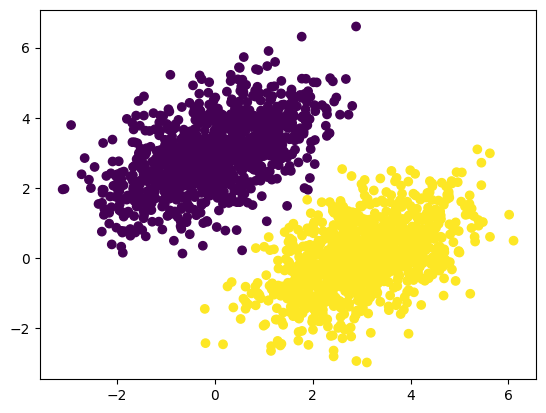

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)   #class 0 :0, class 1:1 일때 확률이 0.5 이상은 1, 미만은 0으로 분류해서 색으로 표현하기 위해 쓴 함수
plt.show()

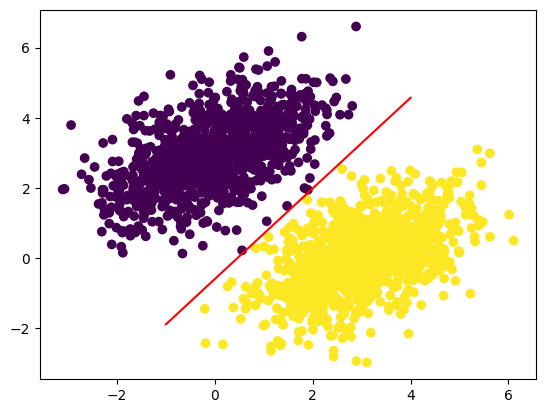

In [ ]:
x = np.linspace(-1, 4, 100)   #x의 시작값 -1, 끝값을 4로 하여 총 100개의 점 생성
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]   #=> 위에서 지정한 x를 이 y 식에 대입하여 직선 그릴 것임
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)   #<-0.5는 3D 평면에서 z축을 0.5로 지정하여 초평면을 그림 => 2D로 변환하면 아래와 같은 선형 직선이 두 그룹을 나눔

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - binary_accuracy: 0.6896 - loss: 5.0670
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.6866 - loss: 4.6824
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6979 - loss: 4.2973  
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7215 - loss: 4.3313 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7160 - loss: 4.0357 


In [ ]:
history.history

{'binary_accuracy': [0.6899999976158142,
  0.6955000162124634,
  0.7014999985694885,
  0.7074999809265137,
  0.7145000100135803],
 'loss': [4.980109214782715,
  4.66200590133667,
  4.398972034454346,
  4.153349876403809,
  3.917731523513794]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - binary_accuracy: 0.9120 - loss: 0.4240 - val_binary_accuracy: 0.9983 - val_loss: 0.0328
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9559 - loss: 0.0809 - val_binary_accuracy: 0.9600 - val_loss: 0.0732
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9648 - loss: 0.0692 - val_binary_accuracy: 0.9583 - val_loss: 0.0566
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9643 - loss: 0.0699 - val_binary_accuracy: 0.9983 - val_loss: 0.0467
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9604 - loss: 0.0757 - val_binary_accuracy: 0.6017 - val_loss: 0.2965


### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[ 0.54723144]
 [-0.18518272]
 [-0.07832852]
 [-0.61815333]
 [-0.26989505]
 [ 0.31662774]
 [ 0.19690429]
 [-0.40071765]
 [ 0.486572  ]
 [ 0.72065294]]


## Summary